In [2]:
#%matplotlib inline

import pystan
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression Example
## Following STAN docs
### Generate some data

[59 77 97 39 32 34  4 42 95 12 55 71 35 73 17 17 30 23 94 43]


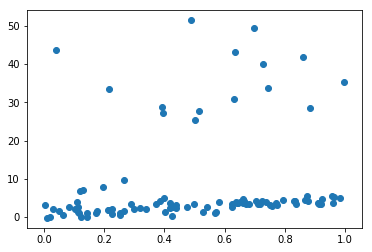

In [10]:
npts = 100
x = np.random.rand(npts)
m = 3.3
c = 1.2
s = 1.1
e = np.random.randn(npts) * s
y = m*x + c + e
sel = np.random.randint(0,npts-1, 20)
print(sel)
y[sel] *= 10

fig, ax = plt.subplots()
ax.scatter(x, y)

dat = {'N': npts,
      'y': y,
      'x': x}

### Setup the STAN model

In [4]:
lin_code = '''
data {
    int<lower = 0> N;
    vector[N] x;
    vector[N] y;
    
}
parameters {
    real alpha;
    real beta;
    real<lower = 0> sigma;
    real<lower = 0> nu;
}
model {
    y ~ student_t(nu, alpha + beta * x, sigma);
}
'''
sm = pystan.StanModel(model_code=lin_code, model_name='RobustLinReg')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL RobustLinReg_fe5d0ea20e8fd5312d4e2c499adb73b3 NOW.


### Now do the sampling

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


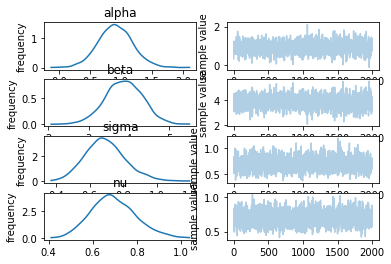

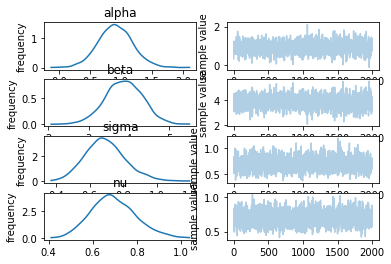

In [11]:
fit = sm.sampling(data=dat, iter=1000, chains=4)
fit.plot()

In [12]:
print(fit)

Inference for Stan model: RobustLinReg_fe5d0ea20e8fd5312d4e2c499adb73b3.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   0.91    0.01   0.28   0.37   0.73   0.91   1.09   1.47    735    1.0
beta    3.88    0.02   0.46   2.94   3.57   3.88    4.2   4.77    776    1.0
sigma   0.69  3.2e-3   0.12   0.48   0.61   0.69   0.77   0.95   1412   1.01
nu      0.69  2.6e-3    0.1   0.51   0.63   0.69   0.76   0.91   1540    1.0
lp__  -213.0    0.05   1.49 -216.8 -213.7 -212.7 -211.9 -211.1    851    1.0

Samples were drawn using NUTS at Wed Feb 14 11:29:29 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [13]:
print(fit['alpha'].mean())

0.9104867221234269


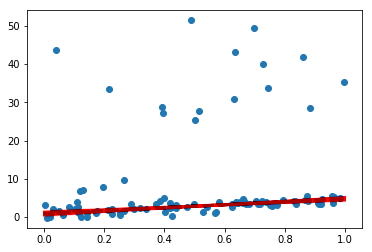

In [14]:
fig, ax = plt.subplots()
ax.scatter(x, y)
xx = np.linspace(0,1,100)
ax.plot(xx, fit['alpha'].mean() + fit['beta'].mean() * xx, 'k--', lw=3)
a = fit['alpha']
b = fit['beta']
for i in range(len(a)):
    ax.plot(xx, a[i] + b[i]*xx, 'r-', alpha=0.01)